In [1]:
import json
import csv
import pandas as pd
import datetime as dt
from matplotlib import pyplot
from pandas import read_csv
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.pyplot as plt
%matplotlib inline


### Loading modules 

First, we load the data. Then, we do some data cleaning in terms of the data types. 

In [2]:
df = pd.read_csv("/Users/nazanin.komeilizadeh/Downloads/adjusted_yellow_2022-01_2024-03_bypulocation.csv")
    

In [3]:
df.head()

,Unnamed: 0,PULocationID,pickup_datetime,counts,total_amount,tip_amount,fare_amount,trip_distance,passenger_count,trip_duration
0,0,4,2022-01-01 00:00:00-05:00,8,23.242388,1.886513,16.681875,3.363750,1.375000,14.481250
1,1,12,2022-01-01 00:00:00-05:00,1,36.592500,6.088500,25.830000,5.600000,4.000000,22.650000
2,2,13,2022-01-01 00:00:00-05:00,10,27.196531,3.027030,19.495500,4.386000,1.300000,14.801666
3,3,24,2022-01-01 00:00:00-05:00,10,18.574230,1.846230,12.915000,2.242000,1.200000,11.380000
4,4,41,2022-01-01 00:00:00-05:00,9,21.188799,1.549800,15.648334,3.082222,1.777778,13.890740


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236501 entries, 0 to 1236500
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1236501 non-null  int64  
 1   PULocationID     1236501 non-null  int64  
 2   pickup_datetime  1236501 non-null  object 
 3   counts           1236501 non-null  int64  
 4   total_amount     1236501 non-null  float64
 5   tip_amount       1236501 non-null  float64
 6   fare_amount      1236501 non-null  float64
 7   trip_distance    1236501 non-null  float64
 8   passenger_count  1236501 non-null  float64
 9   trip_duration    1236501 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 94.3+ MB


In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],utc=True)                     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236501 entries, 0 to 1236500
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   Unnamed: 0       1236501 non-null  int64              
 1   PULocationID     1236501 non-null  int64              
 2   pickup_datetime  1236501 non-null  datetime64[ns, UTC]
 3   counts           1236501 non-null  int64              
 4   total_amount     1236501 non-null  float64            
 5   tip_amount       1236501 non-null  float64            
 6   fare_amount      1236501 non-null  float64            
 7   trip_distance    1236501 non-null  float64            
 8   passenger_count  1236501 non-null  float64            
 9   trip_duration    1236501 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(3)
memory usage: 94.3 MB


In [7]:
df.isna().sum()

Unnamed: 0         0
PULocationID       0
pickup_datetime    0
counts             0
total_amount       0
tip_amount         0
fare_amount        0
trip_distance      0
passenger_count    0
trip_duration      0
dtype: int64

In [9]:
df.drop(['Unnamed: 0','total_amount','tip_amount', 'fare_amount','trip_distance','passenger_count','trip_duration'], axis=1, inplace= True)

In [10]:
df.head()

,PULocationID,pickup_datetime,counts
0,4,2022-01-01 05:00:00+00:00,8
1,12,2022-01-01 05:00:00+00:00,1
2,13,2022-01-01 05:00:00+00:00,10
3,24,2022-01-01 05:00:00+00:00,10
4,41,2022-01-01 05:00:00+00:00,9


In [12]:
df['PULocationID'].unique()

array([  4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
       137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
       164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
       236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263])

In [23]:
df.shape

(1236501, 3)

### Loading the SARIMA package

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Using one Pick-up laction ID

In [26]:
location_id = 79
location_data = df[df['PULocationID'] == location_id].set_index('pickup_datetime')

# Aggregate the data by hour
hourly_data = location_data['counts'].resample('H').sum()

# Fit the SARIMA model
sarima_model = SARIMAX(hourly_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_fit = sarima_model.fit(disp=False)

# Forecast the next 24 hours
forecast = sarima_fit.get_forecast(steps=24)
forecast_index = pd.date_range(start=hourly_data.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)


In [30]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19627 entries, 2022-01-01 05:00:00+00:00 to 2024-04-01 03:00:00+00:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PULocationID  19627 non-null  int64
 1   counts        19627 non-null  int64
dtypes: int64(2)
memory usage: 460.0 KB


In [27]:
hourly_data

pickup_datetime
2022-01-01 05:00:00+00:00    190
2022-01-01 06:00:00+00:00    276
2022-01-01 07:00:00+00:00    258
2022-01-01 08:00:00+00:00    205
2022-01-01 09:00:00+00:00    117
                            ... 
2024-03-31 23:00:00+00:00     93
2024-04-01 00:00:00+00:00    110
2024-04-01 01:00:00+00:00     94
2024-04-01 02:00:00+00:00     65
2024-04-01 03:00:00+00:00     54
Freq: H, Name: counts, Length: 19703, dtype: int64

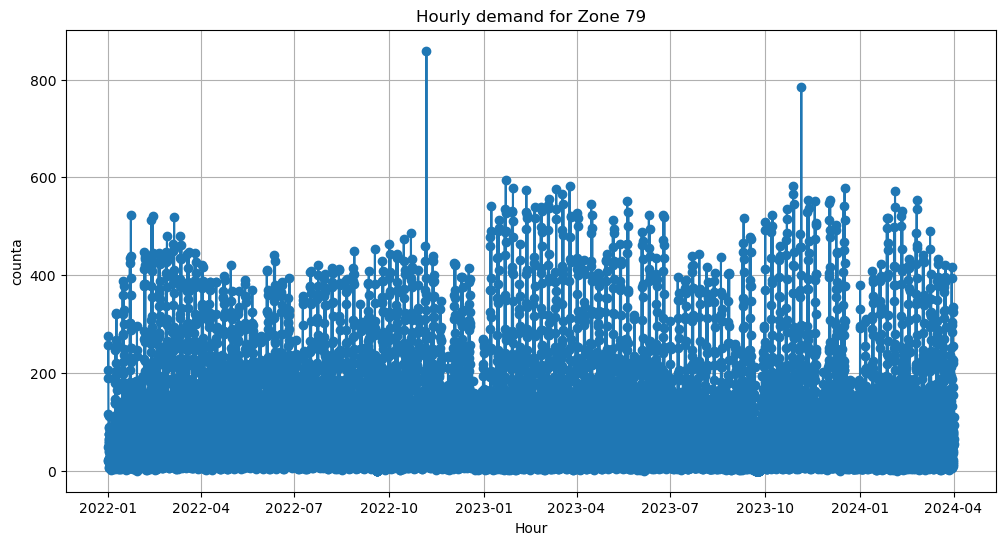

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(location_data.index, location_data['counts'], marker='o')
plt.title('Hourly demand for Zone 79')
plt.xlabel('Hour')
plt.ylabel('counta')
plt.grid(True)
plt.show()

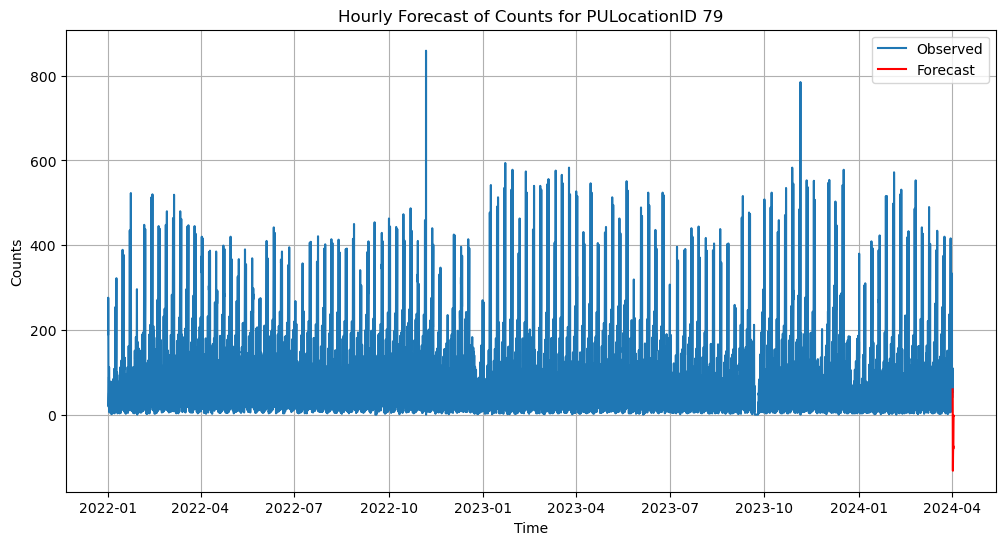

In [33]:
# Plot the results 
plt.figure(figsize=(12, 6))
plt.plot(hourly_data, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title(f'Hourly Forecast of Counts for PULocationID {location_id}')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# MSE
from sklearn.metrics import mean_squared_error

sarima_pred =sarima_fit.get_prediction(start=0, emd=-1)


In [37]:
predicted_values = sarima_pred.predicted_mean

In [39]:
mse = mean_squared_error(hourly_data,predicted_values )

In [40]:
mse

868.5876537135841